## Oppgave 2

In [1]:
from scipy import ndimage, ndarray
from skimage import io,util,color,transform
from IPython import display
import numpy
import sys
import math

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, clear_output

import matplotlib.pyplot as plt

%matplotlib inline

Bildet som skal prosesseres

/home/jim-alexander/.local/lib/python3.6/site-packages/skimage/util/dtype.py:137: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/jim-alexander/.local/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


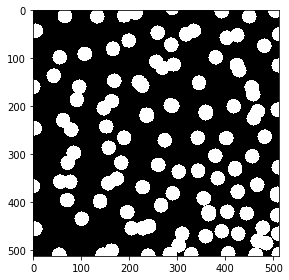

In [2]:
im = util.img_as_bool(io.imread("oppgave2.png", as_gray=True))
io.imshow(im)
io.show()

Funksjonene jeg bruker for å løse oppgavene

In [3]:
def erode(image,se):
    se_height,se_width = se.shape

    pad_v = se_height//2
    pad_h = se_width//2

    padded = util.pad(image,(pad_v,pad_h),mode="constant")

    out = numpy.zeros(image.shape,dtype=bool)
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        subimage = padded[i:i+se_height,j:j+se_width]
        
        out[i,j] = numpy.array_equal(subimage*se,se)
    
    return out

def dilation(image, se):
    se_height,se_width = se.shape

    pad_v = se_height//2
    pad_h = se_width//2

    padded = util.pad(image,(pad_v,pad_h),mode="constant")

    out = numpy.zeros(image.shape,dtype=bool)
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        subimage = padded[i:i+se_height,j:j+se_width]
        out[i,j] = numpy.sum(subimage*se)>0 
    return out

def opening(image, se):
    return dilation(erode(image,se),se)

def compliment(im):
    return (im * -1) + 1

def hitOrMiss(im,se):
    w = numpy.pad(compliment(se),1,'constant',constant_values=1)
    return erode(im,se) & erode(compliment(im), w)

Henter ut en av sirklene som brukes som SE i oppgavene

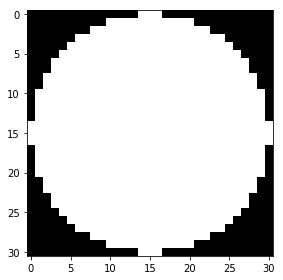

In [4]:
subim = im[48:79,184:215]
io.imshow(subim)
io.show()

Kjører opening for å fjerne sirklene som overlappen med kanten.
Målet her er at alle figurer som er større eller lik SE vil sitte igjen med minst 1 pixel etter erosjon.
Kantsriklene er da midre så de vil forsvinne helt eter erosjon.
Sirklene på innsiden vil da komme tilbake til ca full størelse etter dilation.

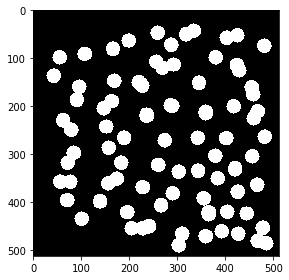

In [5]:
removeEdge = opening(im,subim)
io.imshow(removeEdge,cmap='gray')
io.show()

Videre nå jobber jeg bare på bildet uten kantsirklene da de ikke trengs for å finne overlappene og ikke-overlappene sirkler.

her kjører jeg hit or miss med samme SE som over, da vil jeg bare sitte igjen med 1 pixel på de sirklene som ikke overlapper.
Etter dette kjører jeg dilation for å få sirklene tilbake til orginal størelse.

For å finne overlappende trekker jeg bare ifra bildet med de ikke-overlappende sirklene og sitter igjen med bare de overlappende.

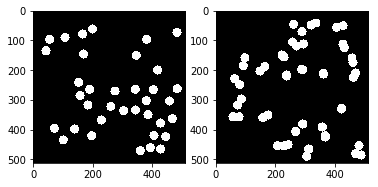

In [6]:
hitOrMissed = hitOrMiss(removeEdge,subim)
dilated = dilation(hitOrMissed,subim)
nonOverlapping = im & dilated
overlapping = removeEdge ^ nonOverlapping

io.imshow_collection([nonOverlapping,overlapping],cmap='gray')
io.show()